# Dogs Vs Cats Image Classification

Something else here


### Initial imports and settings

In [1]:
%matplotlib inline

import numpy as np

# For loading and processing image files
from PIL import Image
import glob
import os

# Visualisations
import matplotlib.pyplot as plt
from collections import Counter

# Set division operator to be Python 3 style
from __future__ import division

Define the path to the data files:

In [2]:
dogs_data_path = "../../data/train/dogs"
cats_data_path = "../../data/train/cats"

### Exploratory Visualisation 

Load the image paths into an array:

In [3]:
dog_images = glob.glob(os.path.join(dogs_data_path, "*.jpg"))
cat_images = glob.glob(os.path.join(cats_data_path, "*.jpg"))

Loop through all the images, defining them as portrait, landscape or square as appropriate based on their sizes.

In [4]:
def get_image_orientation(image_path):
    image = Image.open(image_path)
    aspect_ratio = image.width / image.height
    
    if aspect_ratio > 5/4:
        orientation = "landscape"
    elif aspect_ratio < 4/5:
        orientation = "portrait"
    else:
        orientation = "square"
    return orientation

dog_images_orientation =  [ get_image_orientation(image) for image in dog_images ] 
cat_images_orientation =  [ get_image_orientation(image) for image in cat_images ] 



Now we've calculated the orientation, we need the aggregate data about how many of each type there are in order to plot the data.

In [5]:
dog_images_counter = Counter(dog_images_orientation)
dog_images_items = dict(dog_images_counter)

cat_images_counter = Counter(cat_images_orientation)
cat_images_items = dict(cat_images_counter)

Using the Counter data, plot bar graphs of the Dogs vs Cats image orientations.

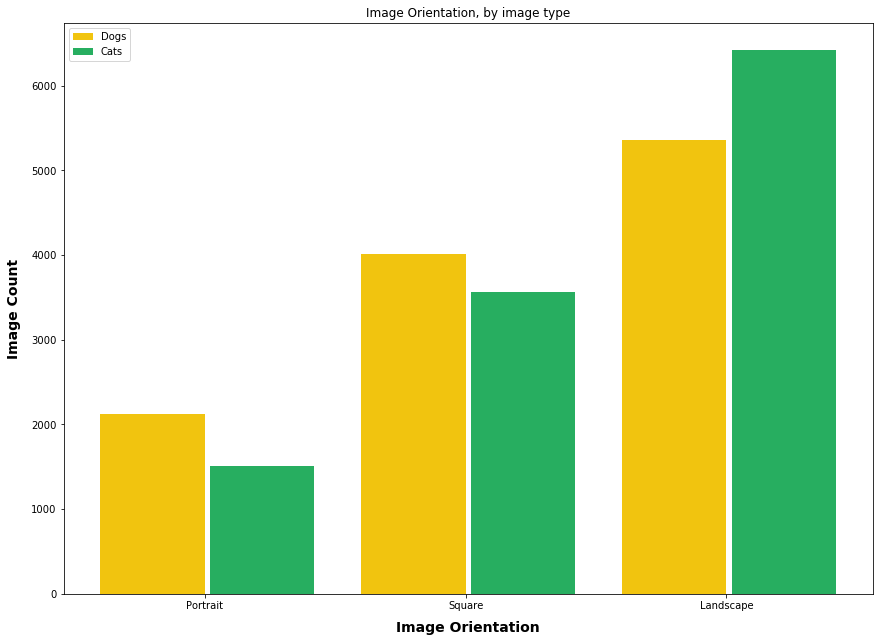

In [6]:
# create plot
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5)
 
# Plot the dogs and cats data
index = np.arange(len(dog_images_items.keys()))
bar_width = 0.4
rects1 = plt.bar(index, dog_images_items.values(), bar_width, color='#f1c40f', label='Dogs')
rects2 = plt.bar(index + bar_width + 0.02, cat_images_items.values(), bar_width, color='#27ae60', label='Cats')
 
# Add x axis label
plt.xlabel('Image Orientation', fontsize=14, fontweight='bold')
ax.xaxis.labelpad = 10 

# And x sublabels
x_names = [ name.title() for name in dog_images_items.keys() ]
plt.xticks(index + (bar_width / 2), x_names)

# Add y axis label
plt.ylabel('Image Count', fontsize=14, fontweight='bold')
ax.yaxis.labelpad = 10 

# Add full image title and legend
plt.title('Image Orientation, by image type')
plt.legend()

plt.show()